In [1]:
%cd D:\MastersFolder\2nd_year\Image_Processing_And_Analysis\Project
    

D:\MastersFolder\2nd_year\Image_Processing_And_Analysis\Project


In [2]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.set_random_seed(2019)

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(2,activation = "softmax")   #Adding the Output Layer
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       7

In [5]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(lr=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy','Precision','Recall'])

In [6]:
import os
base_dir = 'Database/Classification/Segmentation_Classification/ISIC2018/'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')

# Directory with our training cat pictures
train_melanoma_dir = os.path.join(train_dir, 'Melanoma')

# Directory with our training dog pictures
train_non_melanoma_dir = os.path.join(train_dir, 'Non_melanoma')

# Directory with our validation cat pictures
validation_melanoma_dir = os.path.join(validation_dir, 'Melanoma')

# Directory with our validation dog pictures
validation_non_melanoma_dir = os.path.join(validation_dir, '/Non_melanoma')

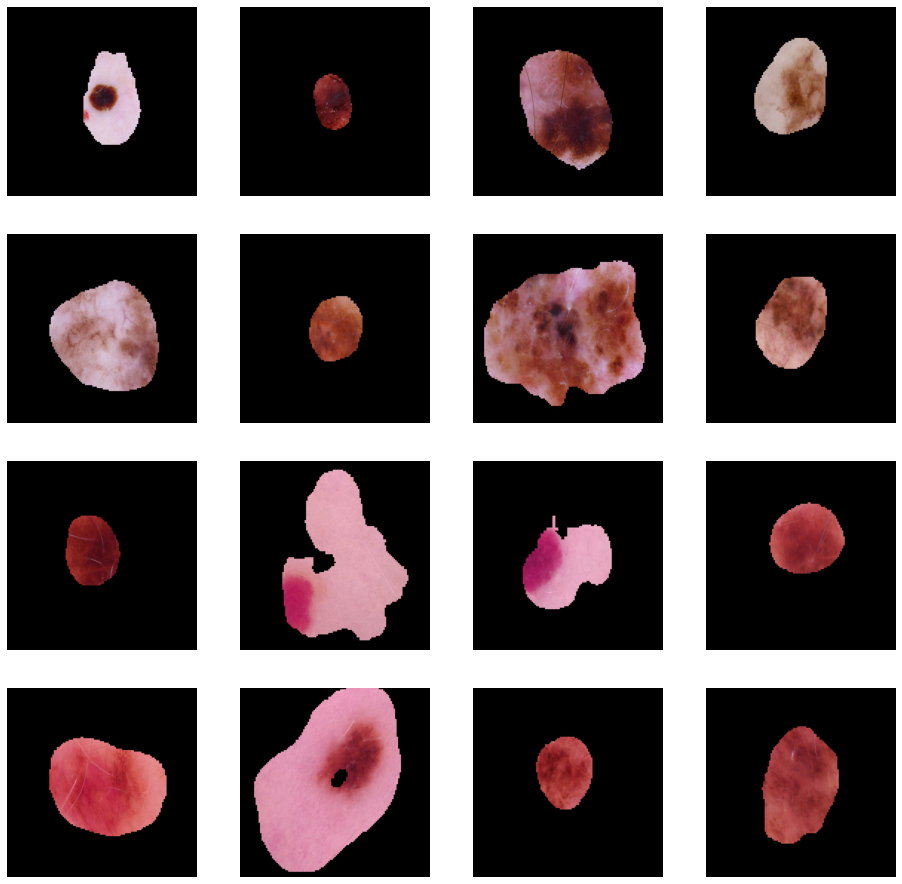

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_melanoma_fnames = os.listdir( train_melanoma_dir )
train_non_melanoma_fnames = os.listdir( train_non_melanoma_dir )


next_melanoma_pix = [os.path.join(train_melanoma_dir, fname) 
                for fname in train_melanoma_fnames[ pic_index-8:pic_index] 
               ]

next_non_melanoma_pix = [os.path.join(train_non_melanoma_dir, fname) 
                for fname in train_non_melanoma_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_melanoma_pix+next_non_melanoma_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [10]:
bs=10
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = bs, class_mode = 'categorical', target_size = (180, 180))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( validation_dir,  batch_size = bs, class_mode = 'categorical', target_size = (180, 180))

Found 1400 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


In [11]:
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)


Device mapping: no known devices.


In [12]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=150 // bs,
                    epochs=30,
                    validation_steps=50 // bs,
                    verbose=2)

Epoch 1/30
15/15 - 5s - loss: 0.6729 - accuracy: 0.5800 - precision: 0.5800 - recall: 0.5800 - val_loss: 0.3668 - val_accuracy: 0.8600 - val_precision: 0.8600 - val_recall: 0.8600
Epoch 2/30
15/15 - 4s - loss: 0.7297 - accuracy: 0.4733 - precision: 0.4733 - recall: 0.4733 - val_loss: 0.7029 - val_accuracy: 0.1000 - val_precision: 0.1000 - val_recall: 0.1000
Epoch 3/30
15/15 - 4s - loss: 0.6938 - accuracy: 0.4533 - precision: 0.4533 - recall: 0.4533 - val_loss: 0.6915 - val_accuracy: 0.8400 - val_precision: 0.8400 - val_recall: 0.8400
Epoch 4/30
15/15 - 4s - loss: 0.6942 - accuracy: 0.4867 - precision: 0.4867 - recall: 0.4867 - val_loss: 0.6715 - val_accuracy: 0.9200 - val_precision: 0.9200 - val_recall: 0.9200
Epoch 5/30
15/15 - 4s - loss: 0.6959 - accuracy: 0.4667 - precision: 0.4667 - recall: 0.4667 - val_loss: 0.6798 - val_accuracy: 0.9200 - val_precision: 0.9200 - val_recall: 0.9200
Epoch 6/30
15/15 - 3s - loss: 0.6939 - accuracy: 0.4667 - precision: 0.4667 - recall: 0.4667 - val_l

In [13]:
for x in history.history:
    print(x)

loss
accuracy
precision
recall
val_loss
val_accuracy
val_precision
val_recall


In [18]:
train_f1=[]
val_f1 = []
NUM_EPOCHS = 30
for i in range(NUM_EPOCHS):
    
    train_f1.append(2* (history.history['precision'][i]*history.history['recall'][i])/(history.history['precision'][i]+history.history['recall'][i]))
    
for i in range(NUM_EPOCHS):
    val_f1.append(2* (history.history['val_precision'][i]*history.history['val_recall'][i])/(history.history['val_precision'][i]+history.history['val_recall'][i]))

In [19]:
print("Train Accuracy = ",history.history['accuracy'][NUM_EPOCHS-1])
print("Train Loss = ",history.history['loss'][NUM_EPOCHS-1])

print("Validation Accuracy = ",history.history['val_accuracy'][NUM_EPOCHS-1])
print("Validation Loss = ",history.history['val_loss'][NUM_EPOCHS-1])


print("Train Recall =",history.history['recall'][NUM_EPOCHS-1])

print("Validation Recall = ",history.history['val_recall'][NUM_EPOCHS-1])


print("Train F1Score =",train_f1[NUM_EPOCHS-2])

print("Validation F1Score =",val_f1[NUM_EPOCHS-2])


Train Accuracy =  0.5066666603088379
Train Loss =  0.6925129890441895
Validation Accuracy =  0.8799999952316284
Validation Loss =  0.6770229935646057
Train Recall = 0.5066666603088379
Validation Recall =  0.8799999952316284
Train F1Score = 0.47999998927116394
Validation F1Score = 0.8399999737739563


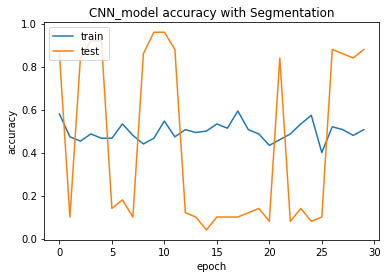

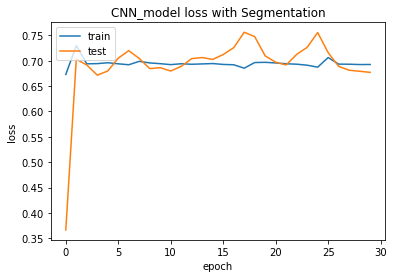

In [20]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN_model accuracy with Segmentation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN_model loss with Segmentation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# RestNet50

In [21]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Add
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Dense

In [22]:
def residual_block(X_start, filters, name, reduce=False, res_conv2d=False):
    """
    Residual building block used by ResNet-50
    """
    nb_filters_1, nb_filters_2, nb_filters_3 = filters
    strides_1 = [2,2] if reduce else [1,1]
        
    X = Conv2D(filters=nb_filters_1, kernel_size=[1,1], strides=strides_1, padding='same', name=name)(X_start)
    X = BatchNormalization()(X)      # default axis-1 is ok
    X = Activation('relu')(X)
    
    X = Conv2D(filters=nb_filters_2, kernel_size=[3,3], strides=[1,1], padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=nb_filters_3, kernel_size=[1,1], strides=[1,1], padding='same')(X)
    X = BatchNormalization()(X)
    
    if res_conv2d:
        X_res = Conv2D(filters=nb_filters_3, kernel_size=[1,1], strides=strides_1, padding='same')(X_start)
        X_res = BatchNormalization()(X_res)
    else:
        X_res = X_start
        
    X = Add()([X, X_res])
    X = Activation('relu')(X)
    return X

In [65]:
def resnet50(input_shape, nb_classes):
    assert len(input_shape) == 3
    
    X_input = Input(shape=input_shape)

    # conv1
    X = Conv2D(filters=64, kernel_size=[7,7], strides=[2,2], padding='same', name='conv1')(X_input)
    X = BatchNormalization(name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D([3,3], strides=[2,2])(X)

    # conv2_x
    X = residual_block(X, filters=[64, 64, 256], name='conv2_a', reduce=False, res_conv2d=True)
    X = residual_block(X, filters=[64, 64, 256], name='conv2_b')
    X = residual_block(X, filters=[64, 64, 256], name='conv2_c')

    # conv3_x
    X = residual_block(X, filters=[128, 128, 512], name='conv3_a', reduce=True, res_conv2d=True)
    X = residual_block(X, filters=[128, 128, 512], name='conv3_b')
    X = residual_block(X, filters=[128, 128, 512], name='conv3_c')
    X = residual_block(X, filters=[128, 128, 512], name='conv3_d')

    # conv4_x
    X = residual_block(X, filters=[256, 256, 1024], name='conv4_a', reduce=True, res_conv2d=True)
    X = residual_block(X, filters=[256, 256, 1024], name='conv4_b')
    X = residual_block(X, filters=[256, 256, 1024], name='conv4_c')
    X = residual_block(X, filters=[256, 256, 1024], name='conv4_d')
    X = residual_block(X, filters=[256, 256, 1024], name='conv4_e')
    X = residual_block(X, filters=[256, 256, 1024], name='conv4_f')

    # conv5_x
    X = residual_block(X, filters=[512, 512, 2048], name='conv5_a', reduce=True, res_conv2d=True)
    X = residual_block(X, filters=[512, 512, 2048], name='conv5_b')
    X = residual_block(X, filters=[512, 512, 2048], name='conv5_c')

    X = GlobalAveragePooling2D(name='avg_pool')(X)
    X = Flatten()(X)
    X = Dense(units=nb_classes, activation='softmax')(X)
    
    model = tf.keras.models.Model(inputs=X_input, outputs=X)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                  loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall'])
    return model

In [66]:
model = resnet50(input_shape=[224, 224, 3], nb_classes=2)

In [67]:
model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_8[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_98 (Activation)      (None, 112, 112, 64) 0           bn_conv1[0][0]                   
_______________________________________________________________________________________

In [68]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(lr=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy','Precision','Recall'])

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# Add our data-augmentation parameters to ImageDataGenerator
rest_train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
rest_test_datagen = ImageDataGenerator( rescale = 1.0/255. )

bs=10
# Flow training images in batches of 20 using train_datagen generator
rest_train_generator = rest_train_datagen.flow_from_directory(train_dir, batch_size = bs, class_mode = 'categorical', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
rest_validation_generator = rest_test_datagen.flow_from_directory(validation_dir,  batch_size = bs, class_mode = 'categorical', target_size = (224, 224))


Found 1400 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


In [34]:

NUM_CLASSES = 2
CHANNELS = 3

IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy','Precision','Recall']

# EARLY_STOP_PATIENCE must be < NUM_EPOCHS
NUM_EPOCHS = 10
EARLY_STOP_PATIENCE = 3

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 16
BATCH_SIZE_VALIDATION = 16

# Using 1 to easily manage mapping between test_generator & prediction for submission preparation
BATCH_SIZE_TESTING = 1

In [84]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = IMAGE_RESIZE

# preprocessing_function is applied on each image but only after re-sizing & augmentation (resize => augment => pre-process)
# Each of the keras.application.resnet* preprocess_input MOSTLY mean BATCH NORMALIZATION (applied on each batch) stabilize the inputs to nonlinear activation functions
# Batch Normalization helps in faster convergence
# Add our data-augmentation parameters to ImageDataGenerator
rest_train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
rest_test_datagen = ImageDataGenerator( rescale = 1.0/255. )


# flow_From_directory generates batches of augmented data (where augmentation can be color conversion, etc)
# Both train & valid folders must have NUM_CLASSES sub-folders
train_generator = rest_train_datagen.flow_from_directory(train_dir,     
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = rest_test_datagen.flow_from_directory(validation_dir,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 

Found 1400 images belonging to 2 classes.
Found 193 images belonging to 2 classes.


In [85]:
(BATCH_SIZE_TRAINING, len(train_generator), BATCH_SIZE_VALIDATION, len(validation_generator))

(16, 88, 16, 13)

In [92]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = 'RestNet50.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [87]:
NUM_EPOCHS = 10
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]
)

Epoch 1/10
10/10 [==============================] - 25s 3s/step - loss: 2.4536 - accuracy: 0.5312 - precision: 0.5312 - recall: 0.5312 - val_loss: 0.6496 - val_accuracy: 0.9062 - val_precision: 0.9062 - val_recall: 0.9062
Epoch 2/10
10/10 [==============================] - 28s 3s/step - loss: 2.8871 - accuracy: 0.4688 - precision: 0.4688 - recall: 0.4688 - val_loss: 0.8093 - val_accuracy: 0.1063 - val_precision: 0.1063 - val_recall: 0.1063
Epoch 3/10
10/10 [==============================] - 27s 3s/step - loss: 2.8526 - accuracy: 0.5188 - precision: 0.5188 - recall: 0.5188 - val_loss: 0.3377 - val_accuracy: 0.9000 - val_precision: 0.9000 - val_recall: 0.9000
Epoch 4/10
10/10 [==============================] - 26s 3s/step - loss: 3.0631 - accuracy: 0.5063 - precision: 0.5063 - recall: 0.5063 - val_loss: 1.2237 - val_accuracy: 0.0938 - val_precision: 0.0938 - val_recall: 0.0938
Epoch 5/10
10/10 [==============================] - 25s 2s/step - loss: 1.7074 - accuracy: 0.4934 - precision: 0

In [89]:
train_f1=[]
val_f1 = []
NUM_EPOCHS = 6
for i in range(NUM_EPOCHS):
    
    train_f1.append(2* (fit_history.history['precision'][i]*fit_history.history['recall'][i])/(fit_history.history['precision'][i]+fit_history.history['recall'][i]))
    
for i in range(NUM_EPOCHS):
    val_f1.append(2* (fit_history.history['val_precision'][i]*fit_history.history['val_recall'][i])/(fit_history.history['val_precision'][i]+fit_history.history['val_recall'][i]))

In [90]:
print("Train Accuracy = ",fit_history.history['accuracy'][NUM_EPOCHS-1])
print("Train Loss = ",fit_history.history['loss'][NUM_EPOCHS-1])

print("Validation Accuracy = ",fit_history.history['val_accuracy'][NUM_EPOCHS-1])
print("Validation Loss = ",fit_history.history['val_loss'][NUM_EPOCHS-1])


print("Train Recall =",fit_history.history['recall'][NUM_EPOCHS-1])

print("Validation Recall = ",fit_history.history['val_recall'][NUM_EPOCHS-1])


print("Train F1Score =",train_f1[NUM_EPOCHS-2])

print("Validation F1Score =",val_f1[NUM_EPOCHS-2])


Train Accuracy =  0.44736841320991516
Train Loss =  1.7282925844192505
Validation Accuracy =  0.11249999701976776
Validation Loss =  2.274540662765503
Train Recall = 0.44736841320991516
Validation Recall =  0.11249999701976776
Train F1Score = 0.4934210479259491
Validation F1Score = 0.09375


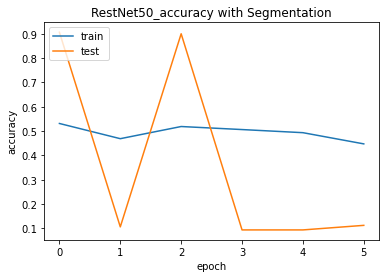

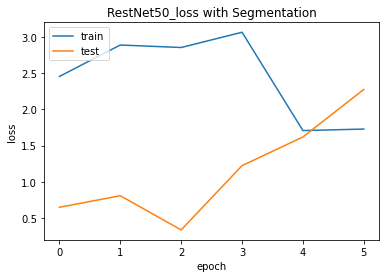

In [91]:
# summarize history for accuracy
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('RestNet50_accuracy with Segmentation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('RestNet50_loss with Segmentation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Transfer Learning Efficient Net

In [93]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')

In [94]:
# IMG_SIZE is determined by EfficientNet model choice
IMG_SIZE = 224

In [95]:
from tensorflow.keras.applications import EfficientNetB0

strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy','Precision','Recall']
    )

model.summary()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 2)                 4052133   
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________


In [96]:
cb_early_stopper = EarlyStopping(monitor = 'val_accuracy', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = 'EfficientnetB0.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [97]:
NUM_EPOCHS = 10
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]
)

Epoch 1/10
10/10 [==============================] - 29s 3s/step - loss: 4.0362 - accuracy: 0.5000 - precision: 0.5000 - recall: 0.5000 - val_loss: 1.4493 - val_accuracy: 0.0938 - val_precision: 0.0938 - val_recall: 0.0938
Epoch 2/10
10/10 [==============================] - 27s 3s/step - loss: 1.9830 - accuracy: 0.6125 - precision: 0.6125 - recall: 0.6125 - val_loss: 2.8878 - val_accuracy: 0.1312 - val_precision: 0.1312 - val_recall: 0.1312
Epoch 3/10
10/10 [==============================] - 26s 3s/step - loss: 1.9214 - accuracy: 0.5625 - precision: 0.5625 - recall: 0.5625 - val_loss: 1.6578 - val_accuracy: 0.1125 - val_precision: 0.1125 - val_recall: 0.1125
Epoch 4/10
10/10 [==============================] - 26s 3s/step - loss: 2.9660 - accuracy: 0.5395 - precision: 0.5395 - recall: 0.5395 - val_loss: 4.9073 - val_accuracy: 0.1000 - val_precision: 0.1000 - val_recall: 0.1000
Epoch 5/10
10/10 [==============================] - 26s 3s/step - loss: 3.7808 - accuracy: 0.5197 - precision: 0

In [98]:
train_f1=[]
val_f1 = []
NUM_EPOCHS = 4
for i in range(NUM_EPOCHS):
    
    train_f1.append(2* (fit_history.history['precision'][i]*fit_history.history['recall'][i])/(fit_history.history['precision'][i]+fit_history.history['recall'][i]))
    
for i in range(NUM_EPOCHS):
    val_f1.append(2* (fit_history.history['val_precision'][i]*fit_history.history['val_recall'][i])/(fit_history.history['val_precision'][i]+fit_history.history['val_recall'][i]))

In [99]:
print("Train Accuracy = ",fit_history.history['accuracy'][NUM_EPOCHS-1])
print("Train Loss = ",fit_history.history['loss'][NUM_EPOCHS-1])

print("Validation Accuracy = ",fit_history.history['val_accuracy'][NUM_EPOCHS-1])
print("Validation Loss = ",fit_history.history['val_loss'][NUM_EPOCHS-1])


print("Train Recall =",fit_history.history['recall'][NUM_EPOCHS-1])

print("Validation Recall = ",fit_history.history['val_recall'][NUM_EPOCHS-1])


print("Train F1Score =",train_f1[NUM_EPOCHS-2])

print("Validation F1Score =",val_f1[NUM_EPOCHS-2])


Train Accuracy =  0.5394737124443054
Train Loss =  2.9659595489501953
Validation Accuracy =  0.10000000149011612
Validation Loss =  4.907271385192871
Train Recall = 0.5394737124443054
Validation Recall =  0.10000000149011612
Train F1Score = 0.5625
Validation F1Score = 0.11249999701976776


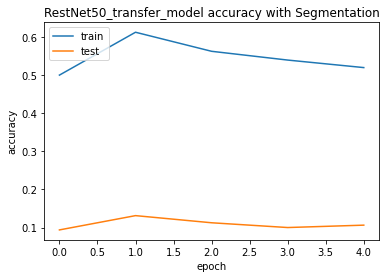

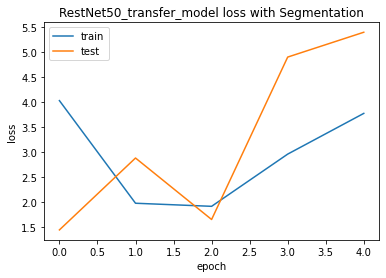

In [100]:
# summarize history for accuracy
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('EfficientNet_transfer_model accuracy with Segmentation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('EfficientNet_transfer_model loss with Segmentation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()